## Eksamen 2021
formål/forløb: 
- webscrap bilhandel.dk
- skriv indhold til csv fil
- brug csv fil til at oprette et pandas df
- res data i df
- brug df til at udføre clustering
- brug df fil til at udføre classification / DecisionTree

In [1]:
            # Imports used in Eksamen_car
# Webscraping
from modules import web_scraping as webc # gets data fra bilhandler.dk
from modules import CSV_car # writes a list of dictionaris to csv fil
from modules import custom_data_frame as cus_df

# Display tables, graf and plots
import pandas as pd # used for Loading and manipulating data (One Hot Encoding)
import numpy as np # calculations
import matplotlib.pyplot as plt # draw graphs
import pprint # sample car 
import datetime # used when writing csv

# Clustering
from sklearn import preprocessing 
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import MeanShift

# Classification
from sklearn.tree import DecisionTreeClassifier # building Classifications tree
from sklearn.tree import plot_tree # draw the tree
from sklearn.model_selection import train_test_split # split data (training and testing) 
from sklearn.model_selection import cross_val_score # for validation
from sklearn.metrics import confusion_matrix # create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draw confusion matrix

In [2]:
# New webscraping will take some time. so a larger is provided in same folder as notebook 
small_webscrap = 'alfa-romeo'
medium_name =  'citroen' #
large_webscrap = 'mercedes'
car_name =  small_webscrap # change this to get another cartype from web #'fiat'
cars = webc.get_all_cars(car_name)
#sample
pprint.pprint(cars[0])

{'Antal døre': '5',
 'Brændstoftype': 'Benzin',
 'Gearkasse': 'Manue',
 'Hestekræfter': '150',
 'Kilometer': 41000,
 'Km/l': 18,
 'Max. påhæng': '1.300',
 'Tophastighed': '210',
 'Vægt': '1.265',
 'model': 'Alfa Romeo Giulietta 1,4 M-Air 150 Sprin',
 'price': '169900',
 'Årgang': '2015'}


In [3]:
# write to csv
#optional (write_cars_to_CSV has defualt file_name = cars.csv)
file_name = CSV_car.create_filename(car_name)
CSV_car.write_cars_to_CSV(cars, file_name)


In [4]:
#file_name_not_web = 'citroen May 31, 2021.csv' 
df = pd.read_csv(file_name) # , header= None, skiprows = 1
df.head()

,model,price,Kilometer,Årgang,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Max. påhæng,Vægt,Gearkasse,Antal døre
0,"Alfa Romeo Giulietta 1,4 M-Air 150 Sprin",169900.0,41000,2015,150.0,18.0,210.0,Benzin,1.3,1.265,Manue,5.0
1,"Alfa Romeo MiTo 1,4 M-Air 170 Quadrifoglio Verde",79900.0,120000,2011,170.0,17.0,219.0,Benzin,1.0,1.195,Manue,3.0
2,"Alfa Romeo Giulietta 1,4 TCT Sportiva",118000.0,106500,2013,170.0,NaN,NaN,Benzin,NaN,NaN,Automatis,NaN
3,"Alfa Romeo Giulia 2,9 Quadrifoglio",297000.0,13747,2018,510.0,NaN,NaN,Benzin,NaN,NaN,Automatis,NaN
4,"Alfa Romeo Stelvio 2,2 JTD 190 Sprint au",559900.0,6000,2021,190.0,21.0,210.0,Diese,1.6,1.635,Automatis,5.0


In [5]:
# for clustering
cluster = df 
cluster.drop(['model','Årgang','Max. påhæng','Vægt','Antal døre'],'columns',inplace=True)
cluster.head()

,price,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse
0,169900.0,41000,150.0,18.0,210.0,Benzin,Manue
1,79900.0,120000,170.0,17.0,219.0,Benzin,Manue
2,118000.0,106500,170.0,NaN,NaN,Benzin,Automatis
3,297000.0,13747,510.0,NaN,NaN,Benzin,Automatis
4,559900.0,6000,190.0,21.0,210.0,Diese,Automatis


In [6]:
# Find missing values in the data and drop those rows: 
print('rows before drop n/a',len(cluster))
bool_matrix = cluster.isnull() # dataframe with True and False values for each cell in the data
only_null_filter = bool_matrix.any(axis=1) # is there a True value in any column in each row. returns a pandas Series with index matching index of cluster dataframe
missing = cluster[only_null_filter] # show all rows that has one or more null values
cluster = cluster.dropna()
print('rows after',len(cluster))
#cluster = clean.row_not_null(cluster)

rows before drop n/a 115
rows after 80


In [7]:
# change char to digit for processing (sklearn)

#print('original df contains rows: '+ (str(len(cluster))))
#df_no_missing = cluster.loc[(cluster['Brændstoftype'] != 'other')]
#print ('if no hybrids og electric cars allowed df: '+ (str(len(df_no_missing))))
#print (df_no_missing['Brændstoftype'].unique())

#cluster = df_no_missing
#label_enc =preprocessing.LabelEncoder()
#cluster['Brændstoftype'] = label_enc.fit_transform(cluster['Brændstoftype'].astype(str))
cluster = cus_df.char_digit(cluster) 
Decission_tree_df = cluster

original df contains rows: 80
if no hybrids og electric cars allowed df: 80
['Benzin' 'Diese']


In [8]:
# One-hot encoding of ('Brændstoftype' , 'Gearkasse') with pd.get_dummies
cluster = pd.get_dummies(cluster,columns=['Gearkasse'])
cluster.head()

,price,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse_Automatis,Gearkasse_Manue
0,169900.0,41000,150.0,18.0,210.0,0,0,1
1,79900.0,120000,170.0,17.0,219.0,0,0,1
4,559900.0,6000,190.0,21.0,210.0,1,1,0
5,64800.0,233000,165.0,12.0,216.0,0,0,1
6,119500.0,209000,192.0,9.0,225.0,0,0,1


In [9]:
#cluster = df_no_missing
estimated = int(estimate_bandwidth(cluster)) # (meanShift)
estimated
#cluster['price'].unique()

129329

In [10]:
analyzer = MeanShift(bandwidth=estimated) 
analyzer.fit(cluster)

MeanShift(bandwidth=129329, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [11]:
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 2 1 0 1 1
 0 0 0 1 0 0]


 [0 1 2]


In [12]:
# indixing clusters
cluster['cluster_group'] = np.nan
data_length=len(cluster)
for i in range(data_length): # loop 714 rows
    cluster.iloc[i,cluster.columns.get_loc('cluster_group')] = labels[i] #set the cluster label on each row

cluster.head()
#cluster

,price,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse_Automatis,Gearkasse_Manue,cluster_group
0,169900.0,41000,150.0,18.0,210.0,0,0,1,0.0
1,79900.0,120000,170.0,17.0,219.0,0,0,1,0.0
4,559900.0,6000,190.0,21.0,210.0,1,1,0,1.0
5,64800.0,233000,165.0,12.0,216.0,0,0,1,0.0
6,119500.0,209000,192.0,9.0,225.0,0,0,1,0.0


In [13]:
cluster.describe()
#cluster['price'].unique()

,price,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse_Automatis,Gearkasse_Manue,cluster_group
count,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,208744.60000,104451.562500,176.437500,17.27500,217.550000,0.362500,0.375000,0.625000,0.312500
std,170398.58582,75291.509257,42.343933,4.62786,16.260459,0.483755,0.487177,0.487177,0.492828
min,9900.00000,0.000000,85.000000,8.00000,172.000000,0.000000,0.000000,0.000000,0.000000
25%,79775.00000,36050.000000,153.750000,14.00000,210.000000,0.000000,0.000000,0.000000,0.000000
50%,162400.00000,95500.000000,170.000000,17.00000,218.000000,0.000000,0.000000,1.000000,0.000000
75%,307400.00000,162750.000000,200.000000,21.00000,230.000000,1.000000,1.000000,1.000000,1.000000
max,749795.00000,322000.000000,280.000000,26.00000,257.000000,1.000000,1.000000,1.000000,2.000000


In [14]:
#Grouping cars by Cluster
cluster_cluster_data = cluster.groupby(['cluster_group']).mean()
#Count of cars in each cluster
cluster_cluster_data['Counts'] = pd.Series(cluster.groupby(['cluster_group']).size())
cluster_cluster_data

,price,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse_Automatis,Gearkasse_Manue,Counts
cluster_group,,,,,,,,,
0.0,111169.428571,136685.714286,163.482143,16.607143,213.821429,0.339286,0.125000,0.875000,56
1.0,422795.000000,30508.695652,203.478261,18.956522,226.086957,0.434783,0.956522,0.043478,23
2.0,749795.000000,25.000000,280.000000,16.000000,230.000000,0.000000,1.000000,0.000000,1


## Conclusion (Citroen)
- Cluster 0
  - Have 865 cars
  - The average priec is closs to `80.000 kr.` 
  - Milliage to be expected is 128.000 kilometer(medium to heigh) which could mean heigher cost of maintenance. 
  - They have low amount of hp(hosepower).
  - They are considered to have a low fuel consumtion. => 23 km/l  
  - It's most likely to be a manual gearbox 
  - Its 50/50 if the cars will be runing on petrol or Diesel as fueltype  
  sumup: medium->low price, low hp, good fuel consumtion, mostly manual gear box 
  
- Cluster 1
  - Have 82 cars
  - The average priec is closs to `275.000 kr.` 
  - Milliage to be expected is 19.000 kilometer(low->very low) which means its unlikely to get unforseen maintenance. 
  - They have avage amount of hp(hosepower).
  - They are considered to have a very low fuel consumtion. => 27 km/l   
  - Its 2/3 of the cars will be running on Diesel as fueltype  
  sumup: medium->heigh price, average hp, very good fuel consumtion``  


## lets make a decission tree to look at what fuel we may end up with

In [15]:
Decission_tree_df = cluster.drop('price', axis=1).copy()
#Decission_tree_df = pd.read_csv('alfa-romeo May 30, 2021.csv')
Decission_tree_df.head()

,Kilometer,Hestekræfter,Km/l,Tophastighed,Brændstoftype,Gearkasse_Automatis,Gearkasse_Manue,cluster_group
0,41000,150.0,18.0,210.0,0,0,1,0.0
1,120000,170.0,17.0,219.0,0,0,1,0.0
4,6000,190.0,21.0,210.0,1,1,0,1.0
5,233000,165.0,12.0,216.0,0,0,1,0.0
6,209000,192.0,9.0,225.0,0,0,1,0.0


In [16]:
Decission_tree_df.dtypes 
Decission_tree_df['Gearkasse_Manue'].unique()

array([1, 0], dtype=uint8)

In [17]:
# Make a new copy of the columns to predictions
X = Decission_tree_df.drop('Brændstoftype', axis=1).copy() #all columns but Brændstoftype
X.head()

,Kilometer,Hestekræfter,Km/l,Tophastighed,Gearkasse_Automatis,Gearkasse_Manue,cluster_group
0,41000,150.0,18.0,210.0,0,1,0.0
1,120000,170.0,17.0,219.0,0,1,0.0
4,6000,190.0,21.0,210.0,1,0,1.0
5,233000,165.0,12.0,216.0,0,1,0.0
6,209000,192.0,9.0,225.0,0,1,0.0


In [18]:
y = Decission_tree_df['Brændstoftype'].copy()
y.head()

0    0
1    0
4    1
5    0
6    0
Name: Brændstoftype, dtype: int64

In [19]:
X.dtypes

Kilometer                int64
Hestekræfter           float64
Km/l                   float64
Tophastighed           float64
Gearkasse_Automatis      uint8
Gearkasse_Manue          uint8
cluster_group          float64
dtype: object

In [20]:
#pd.get_dummies(X, columns=['Brændstoftype']).head()  # if more than 2 types of fuel in df


In [21]:
#if y contains more than 2 values 
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1 # set eacg non-zero value in y to 1
y.unique()


array([0, 1])

In [22]:
# split data to train and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

# crate a decission tree and fit i with traning data
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt = clf_dt.fit(X_train, y_train)

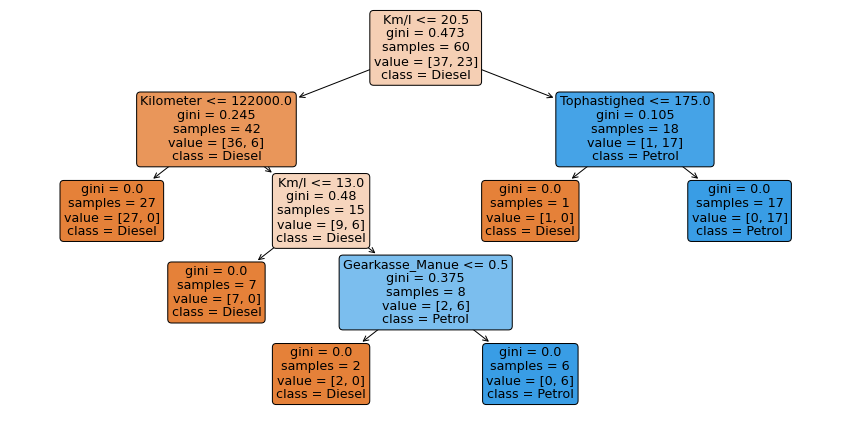

In [23]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['Diesel', 'Petrol'],
         feature_names=X.columns);

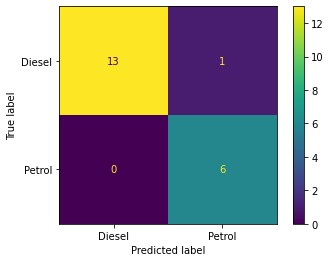

In [24]:
#confusion matrix:
#A confusion matrix is a summary of prediction results on a classification problem.
#The number of correct and incorrect predictions are summarized with count values and broken down by each class.
plot_confusion_matrix(clf_dt, X_test , y_test, display_labels = ['Diesel', 'Petrol'], values_format='')

In [25]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # sxclude the maximum value for alpha

clf_dts = [] # list for decision trees
## one decision tree per value for alpha and store it in the list
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

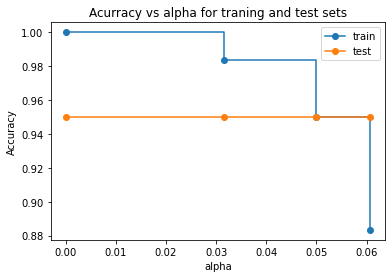

In [26]:
# make a graf for accuracy vs alpha for traing and testing
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Acurracy vs alpha for traning and test sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend() # 
plt.show()

best value is around 0,05 (eyeballing it)

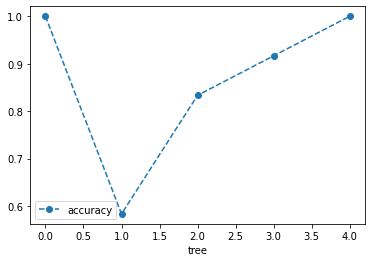

In [27]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.05)
# 7 fold cross validation creates 7 different training and testing datasets that used to train and test the tree
scores= cross_val_score(clf_dt, X_train, y_train, cv=5)
Decission_tree_df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

Decission_tree_df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

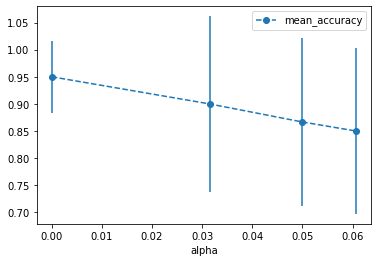

In [28]:
alpha_loop_values = []
# pr value run 5 fold cross validation
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha = ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv= 5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])    

# draw a graf 
alpha_results = pd.DataFrame(alpha_loop_values, columns= ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr = 'std', marker='o', linestyle='--')

here its show that 0.03 has a better acurracy

In [29]:
alpha_results[(alpha_results['alpha'] > 0.0054) & (alpha_results['alpha'] < 0.007)]

,alpha,mean_accuracy,std


In [30]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0054) & (alpha_results['alpha'] < 0.007)] 
ideal_ccp_alpha

,alpha,mean_accuracy,std


In [31]:
ideal = float(0.005487)

In [32]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha= ideal)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

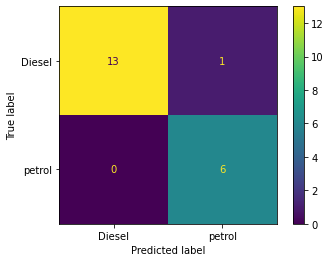

In [33]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=['Diesel', 'petrol'],values_format='')

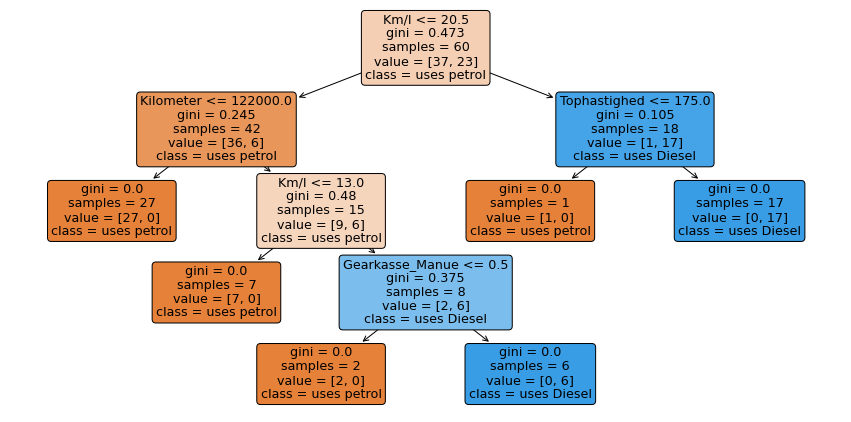

In [34]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
         filled = True,
         rounded= True,
         class_names=['uses petrol', 'uses Diesel'],
         feature_names=X.columns);